# Train Test Split different ratios

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm


In [151]:
N = np.genfromtxt('expthediff.dat',usecols=0) #Number of neutrons
Z = np.genfromtxt('expthediff.dat',usecols=1) #Number of protons
A = N+Z # Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y = np.genfromtxt('expthediff.dat',usecols=2)
X = np.transpose(np.stack((N,Z)))


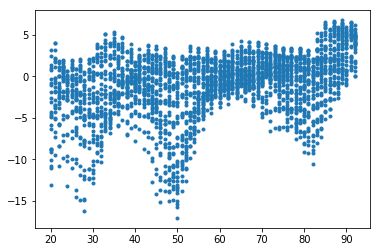

In [152]:
plt.plot(Z,y,'o',markersize=3)
plt.show()

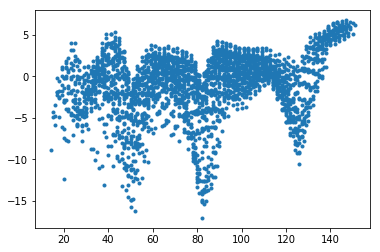

In [153]:
plt.plot(N,y,'o',markersize=3)
plt.show()

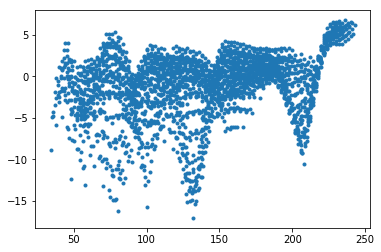

In [154]:
plt.plot(A,y,'o',markersize=3)
plt.show()

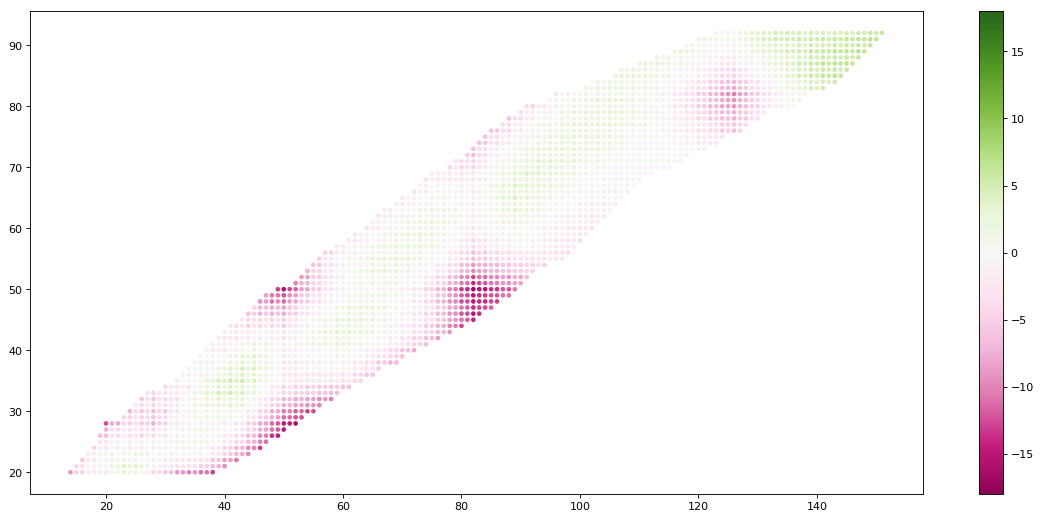

In [155]:
ext = np.int(np.ceil(max(-np.min(y),np.max(y))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N,Z,c=y,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

In [156]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
nerr_tr =[]
nerr_te =[]
derr_tr =[]
derr_te =[]
acc_tr  =[]
acc_te  =[]
sco_tr  =[]
sco_te  =[]
nl_train=[]
nl_test =[]
diff_tr =[]
diff_te =[]

for n in range(5, 96, 5):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =n/100, random_state=42 )
    rf.fit(X_train, y_train);
    nl_test.append(n)
    nl_train.append(100-n)
    
    print('train size: ', 100-n, '%')
    print('test size:  ', n, '%')
    
    print('train score: ', round(rf.score(X_train, y_train),5))
    print('test  score: ', round(rf.score(X_test,  y_test ),5))
    sco_tr.append(round(rf.score(X_train, y_train),5))
    sco_te.append(round(rf.score(X_test,  y_test ),5))
    
    
    pred_train= rf.predict(X_train)
    pred_test = rf.predict(X_test )

    err_train = abs(y_train-pred_train)
    err_test  = abs(y_test- pred_test )
    
    print('mean error of train:', round(np.mean(err_train),5))
    print('mean error of test: ', round(np.mean(err_test),5))
    
    nerr_tr.append(round(np.mean(err_train),5))
    nerr_te.append(round(np.mean(err_test ),5))
    
    
    print('median error of train:', round(np.median(err_train),5))
    print('median error of test: ', round(np.median(err_test),5))
    
    derr_tr.append(round(np.median(err_train),5))
    derr_te.append(round(np.median(err_test ),5))
    
    diff_train=y_train-rf.predict(X_train)
    diff_test =y_test -rf.predict(X_test )
    
    diff_tr.append(diff_train)
    diff_te.append(diff_test)

    # Plot between -10 and 10 with .001 steps.
    x_axis = np.arange(-10, 10, 0.001)
    # Mean = 0, SD = 2.
    plt.plot(x_axis, norm.pdf(x_axis, np.mean(diff_train), np.std(diff_train)))
    plt.show()
    
    print('\n')
    
    
    # Plot between -10 and 10 with .001 steps.
    x_axis = np.arange(-10, 10, 0.001)
    # Mean = 0, SD = 2.
    plt.plot(x_axis, norm.pdf(x_axis, np.mean(diff_test), np.std(diff_test)))
    plt.show()
    
    print('\n')
    
    
    plt.plot(np.transpose(X_train)[0]+np.transpose(X_train)[1],diff_train,'o',markersize=1,label='train Error')
    plt.plot(np.transpose(X_test )[0]+np.transpose(X_test )[1],diff_test ,'o',markersize=1,label='test  Error')
    plt.legend()
    plt.show()
    
    print('\n')
    
    

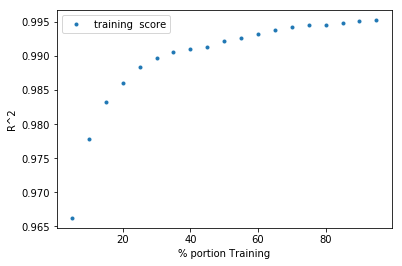

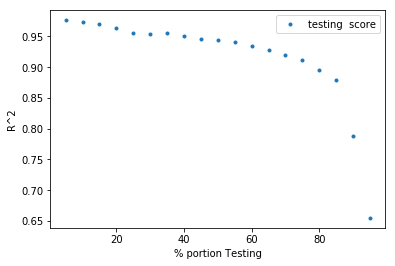

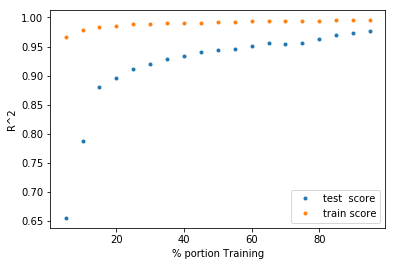

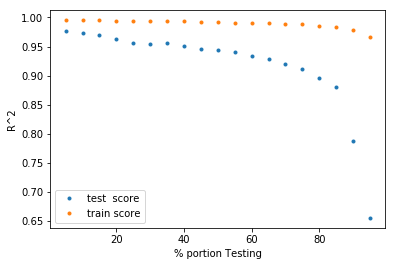

In [138]:
#plt.plot(nl_train, nerr_tr, 'o', markersize=5, label='mean error of training')
#plt.legend()
#plt.show()



Score     = np.transpose(np.stack((nl_train, nl_test, sco_tr , sco_te)))
Mean      = np.transpose(np.stack((nl_train, nl_test, nerr_tr, nerr_te)))
Median    = np.transpose(np.stack((nl_train, nl_test, derr_tr, derr_te)))
Noise     = np.transpose(np.stack((nl_train, nl_test, diff_tr, diff_te)))


everything=np.transpose(np.stack((nl_train,
                                  nl_test, 
                                  sco_tr, 
                                  sco_te,
                                  nerr_tr, 
                                  nerr_te,
                                  derr_tr, 
                                  derr_te, 
                                  diff_tr, 
                                  diff_te )))


plt.plot(np.transpose(Score)[0],np.transpose(Score)[2],'o',markersize=3,label='training  score')
plt.xlabel('% portion Training')
plt.ylabel('R^2')
plt.legend()
plt.show()

plt.plot(np.transpose(Score)[1],np.transpose(Score)[3],'o',markersize=3,label='testing  score')
plt.xlabel('% portion Testing')
plt.ylabel('R^2')
plt.legend()
plt.show()

plt.plot(np.transpose(Score)[0],np.transpose(Score)[3],'o',markersize=3,label='test  score')
plt.plot(np.transpose(Score)[0],np.transpose(Score)[2],'o',markersize=3,label='train score')
plt.xlabel('% portion Training')
plt.ylabel('R^2')
plt.legend()
plt.show()

plt.plot(np.transpose(Score)[1],np.transpose(Score)[3],'o',markersize=3,label='test  score')
plt.plot(np.transpose(Score)[1],np.transpose(Score)[2],'o',markersize=3,label='train score')
plt.xlabel('% portion Testing')
plt.ylabel('R^2')
plt.legend()
plt.show()


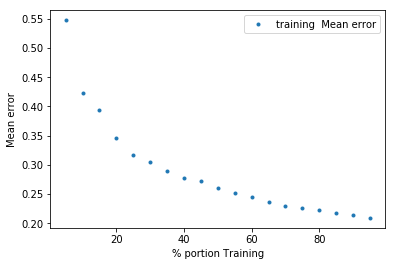

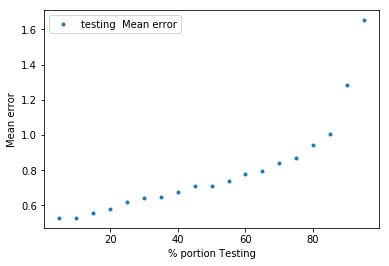

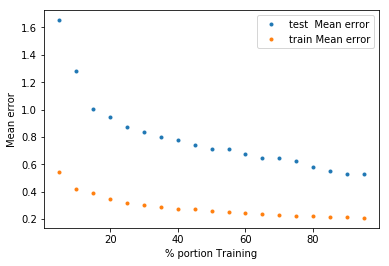

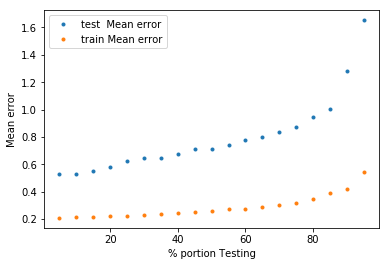

In [131]:
plt.plot(np.transpose(Mean)[0],np.transpose(Mean)[2],'o',markersize=3,label='training  Mean error')
plt.xlabel('% portion Training')
plt.ylabel('Mean error')
plt.legend()
plt.show()
plt.plot(np.transpose(Mean)[1],np.transpose(Mean)[3],'o',markersize=3,label='testing  Mean error')
plt.xlabel('% portion Testing')
plt.ylabel('Mean error')
plt.legend()
plt.show()
plt.plot(np.transpose(Mean)[0],np.transpose(Mean)[3],'o',markersize=3,label='test  Mean error')
plt.plot(np.transpose(Mean)[0],np.transpose(Mean)[2],'o',markersize=3,label='train Mean error')
plt.xlabel('% portion Training')
plt.ylabel('Mean error')
plt.legend()
plt.show()
plt.plot(np.transpose(Mean)[1],np.transpose(Mean)[3],'o',markersize=3,label='test  Mean error')
plt.plot(np.transpose(Mean)[1],np.transpose(Mean)[2],'o',markersize=3,label='train Mean error')
plt.xlabel('% portion Testing')
plt.ylabel('Mean error')
plt.legend()
plt.show()



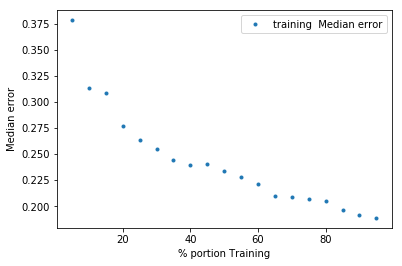

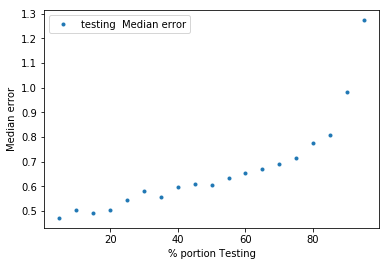

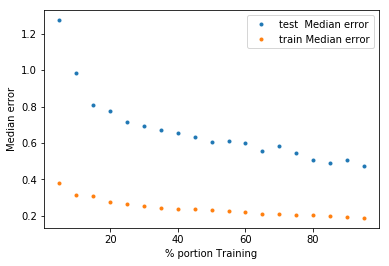

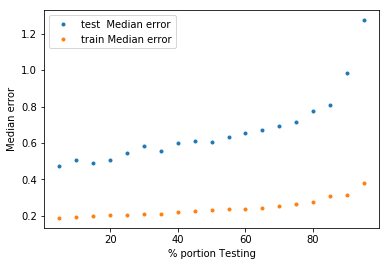

In [132]:
plt.plot(np.transpose(Median)[0],np.transpose(Median)[2],'o',markersize=3,label='training  Median error')
plt.xlabel('% portion Training')
plt.ylabel('Median error')
plt.legend()
plt.show()

plt.plot(np.transpose(Median)[1],np.transpose(Median)[3],'o',markersize=3,label='testing  Median error')
plt.xlabel('% portion Testing')
plt.ylabel('Median error')
plt.legend()
plt.show()

plt.plot(np.transpose(Median)[0],np.transpose(Median)[3],'o',markersize=3,label='test  Median error')
plt.plot(np.transpose(Median)[0],np.transpose(Median)[2],'o',markersize=3,label='train Median error')
plt.xlabel('% portion Training')
plt.ylabel('Median error')
plt.legend()
plt.show()

plt.plot(np.transpose(Median)[1],np.transpose(Median)[3],'o',markersize=3,label='test  Median error')
plt.plot(np.transpose(Median)[1],np.transpose(Median)[2],'o',markersize=3,label='train Median error')
plt.xlabel('% portion Testing')
plt.ylabel('Median error')
plt.legend()
plt.show()



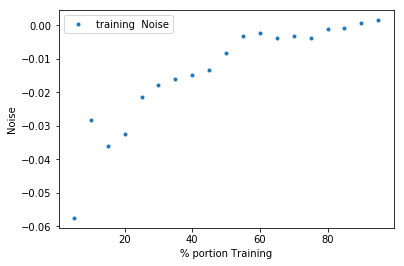

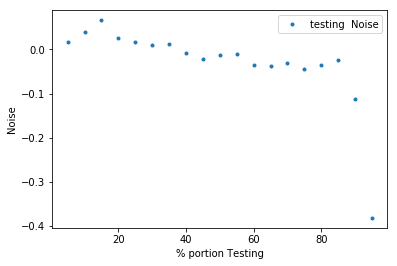

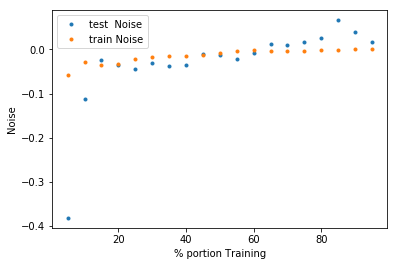

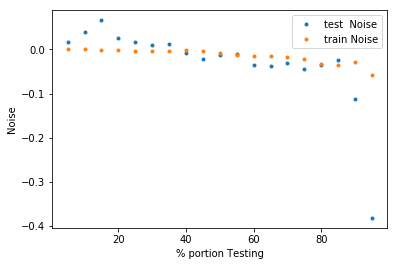

In [136]:
plt.plot(np.transpose(Noise)[0],np.transpose(Noise)[2],'o',markersize=3,label='training  Noise')
plt.xlabel('% portion Training')
plt.ylabel('Noise')
plt.legend()
plt.show()

plt.plot(np.transpose(Noise)[1],np.transpose(Noise)[3],'o',markersize=3,label='testing  Noise')
plt.xlabel('% portion Testing')
plt.ylabel('Noise')
plt.legend()
plt.show()

plt.plot(np.transpose(Noise)[0],np.transpose(Noise)[3],'o',markersize=3,label='test  Noise')
plt.plot(np.transpose(Noise)[0],np.transpose(Noise)[2],'o',markersize=3,label='train Noise')
plt.xlabel('% portion Training')
plt.ylabel('Noise')
plt.legend()
plt.show()

plt.plot(np.transpose(Noise)[1],np.transpose(Noise)[3],'o',markersize=3,label='test  Noise')
plt.plot(np.transpose(Noise)[1],np.transpose(Noise)[2],'o',markersize=3,label='train Noise')
plt.xlabel('% portion Testing')
plt.ylabel('Noise')
plt.legend()
plt.show()


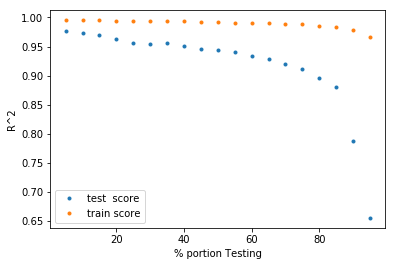

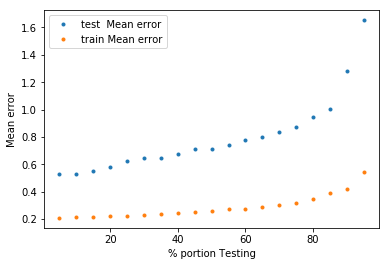

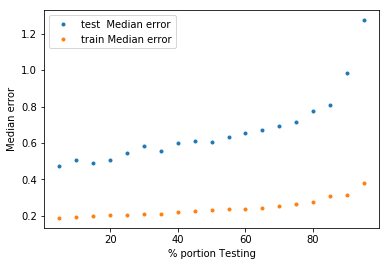

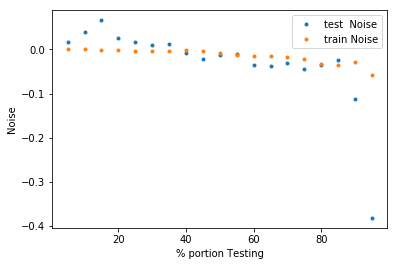

In [139]:
plt.plot(np.transpose(Score)[1],np.transpose(Score)[3],'o',markersize=3,label='test  score')
plt.plot(np.transpose(Score)[1],np.transpose(Score)[2],'o',markersize=3,label='train score')
plt.xlabel('% portion Testing')
plt.ylabel('R^2')
plt.legend()
plt.show()


plt.plot(np.transpose(Mean)[1],np.transpose(Mean)[3],'o',markersize=3,label='test  Mean error')
plt.plot(np.transpose(Mean)[1],np.transpose(Mean)[2],'o',markersize=3,label='train Mean error')
plt.xlabel('% portion Testing')
plt.ylabel('Mean error')
plt.legend()
plt.show()



plt.plot(np.transpose(Median)[1],np.transpose(Median)[3],'o',markersize=3,label='test  Median error')
plt.plot(np.transpose(Median)[1],np.transpose(Median)[2],'o',markersize=3,label='train Median error')
plt.xlabel('% portion Testing')
plt.ylabel('Median error')
plt.legend()
plt.show()



plt.plot(np.transpose(Noise)[1],np.transpose(Noise)[3],'o',markersize=3,label='test  Noise')
plt.plot(np.transpose(Noise)[1],np.transpose(Noise)[2],'o',markersize=3,label='train Noise')
plt.xlabel('% portion Testing')
plt.ylabel('Noise')
plt.legend()
plt.show()


(array([3.0000e+00, 1.3000e+01, 5.8000e+01, 2.4000e+02, 9.2300e+02,
        2.4160e+03, 5.5250e+03, 9.5880e+03, 1.4426e+04, 1.7612e+04,
        1.7423e+04, 1.3977e+04, 9.3180e+03, 5.1400e+03, 2.1970e+03,
        8.2700e+02, 2.5800e+02, 4.4000e+01, 1.0000e+01, 2.0000e+00]),
 array([0.14665469, 0.63405428, 1.12145388, 1.60885348, 2.09625307,
        2.58365267, 3.07105227, 3.55845187, 4.04585146, 4.53325106,
        5.02065066, 5.50805025, 5.99544985, 6.48284945, 6.97024905,
        7.45764864, 7.94504824, 8.43244784, 8.91984743, 9.40724703,
        9.89464663]),
 <a list of 20 Patch objects>)

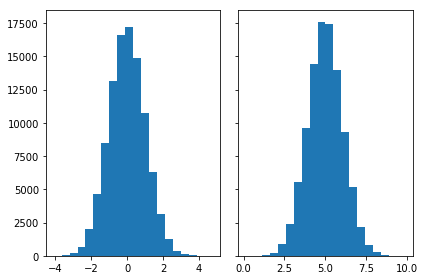

In [144]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

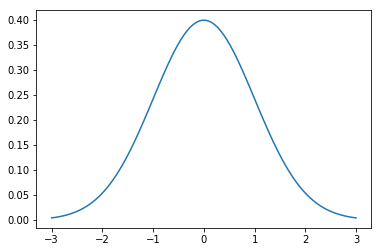

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()
print(x)